<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


#### Add your code below following the instructions given in the course


Task 4: Generate Descriptive Statistics and Visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


1. For the "Median value of owner-occupied homes" provide a boxplot

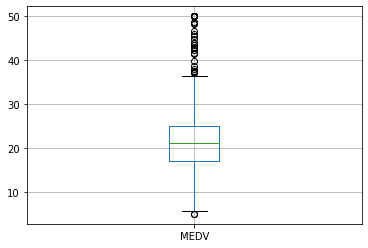

In [4]:
boxplot = boston_df.boxplot(column=['MEDV'])

2. Provide a  bar plot for the Charles river variable

<AxesSubplot:>

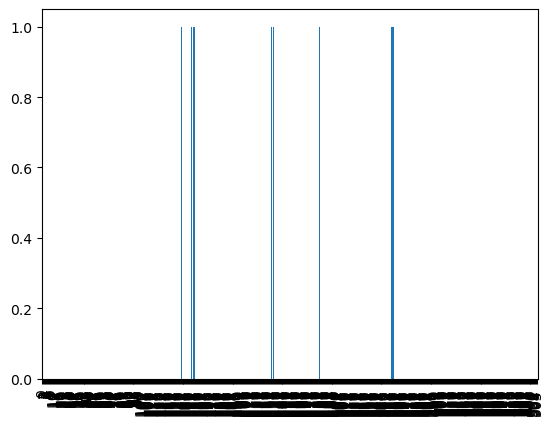

In [26]:
boston_df['CHAS'].plot(kind="bar")

3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [6]:
boston_df.loc[(boston_df['AGE'] <= 40), 'age_group'] = '40 years and younger'
boston_df.loc[(boston_df['AGE'] > 40)&(boston_df['AGE'] < 57), 'age_group'] = 'between 40 and 57 years'
boston_df.loc[(boston_df['AGE'] >= 57), 'age_group'] = '57 years and older'

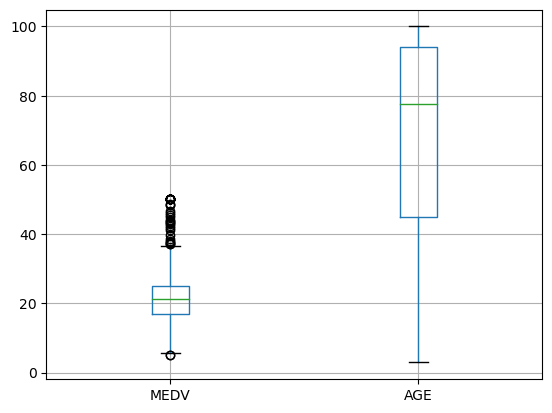

In [7]:
boxplot = boston_df.boxplot(column=['MEDV','AGE'])

4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

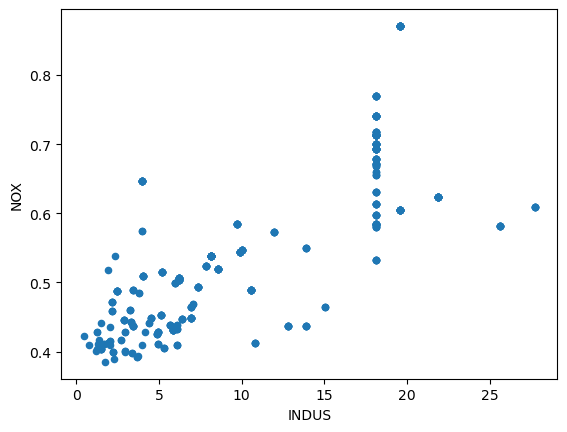

In [8]:
boston_df.plot.scatter(x="INDUS",y="NOX")
plot.show()

In [ ]:
#there is a strong positive linear relationship between the two variables

5. Create a histogram for the pupil to teacher ratio variable



array([[<AxesSubplot:title={'center':'PTRATIO'}>]], dtype=object)

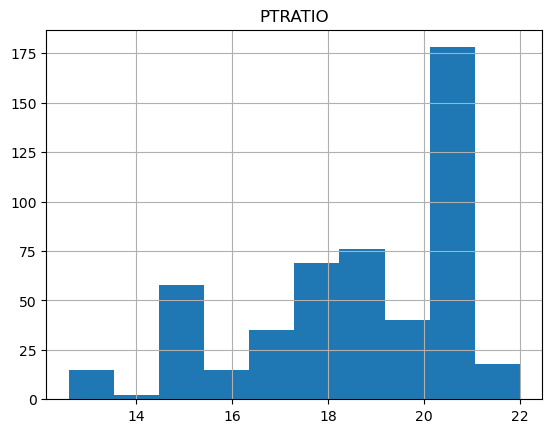

In [ ]:
boston_df.hist(column='PTRATIO')

Task 5: Use the appropriate tests to answer the questions provided.

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [10]:
'''

 H0 =  there is no significant difference in median value of houses bounded by the Charles river 
 H1 =  there is a significant difference in median value of houses bounded by the Charles river 

'''
## X is the input variables (or independent variables)
X = boston_df['MEDV']
## y is the target/dependent variable
y = boston_df['CHAS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CHAS   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           7.39e-05
Time:                        07:42:12   Log-Likelihood:                -16.144
No. Observations:                 506   AIC:                             36.29
Df Residuals:                     504   BIC:                             44.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0399      0.029     -1.354      0.176      -0.098       0.018
MEDV           0.0048      0.001      3.996      0.000       0.002       0.007
==============================================================================
Omnibus:                      353.684   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2621.933
Skew:                           3.251   Prob(JB):                         0.00
Kurtosis:                      12.060   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Conclusion- the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is significant difference in median value of houses bounded by the Charles river 


Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [12]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


In [13]:
# Conclusion- the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is significant difference in median value of houses bounded by the Charles river 


Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)



In [14]:

'''

 H0 =  there is no significant difference in Nitric oxide concentrations and proportion of non-retail business acres per town
 H1 =  there is a significant difference in Nitric oxide concentrations and proportion of non-retail business acres per town

'''

## X is the input variables (or independent variables)
X = boston_df['NOX']
## y is the target/dependent variable
y = boston_df['INDUS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           7.91e-98
Time:                        07:43:43   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#Conclusion: p < 0.05,so we reject the null hypothesis as there is evidence that there is a  correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
